# Agriculture crop yeld


## Introducere

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns



In [16]:
df=pd.read_csv("crop_yield.csv")


 Stergerea coloanelor lipsa si valorilor null si nan

In [17]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare]
Index: []


Histograma datelor agricole

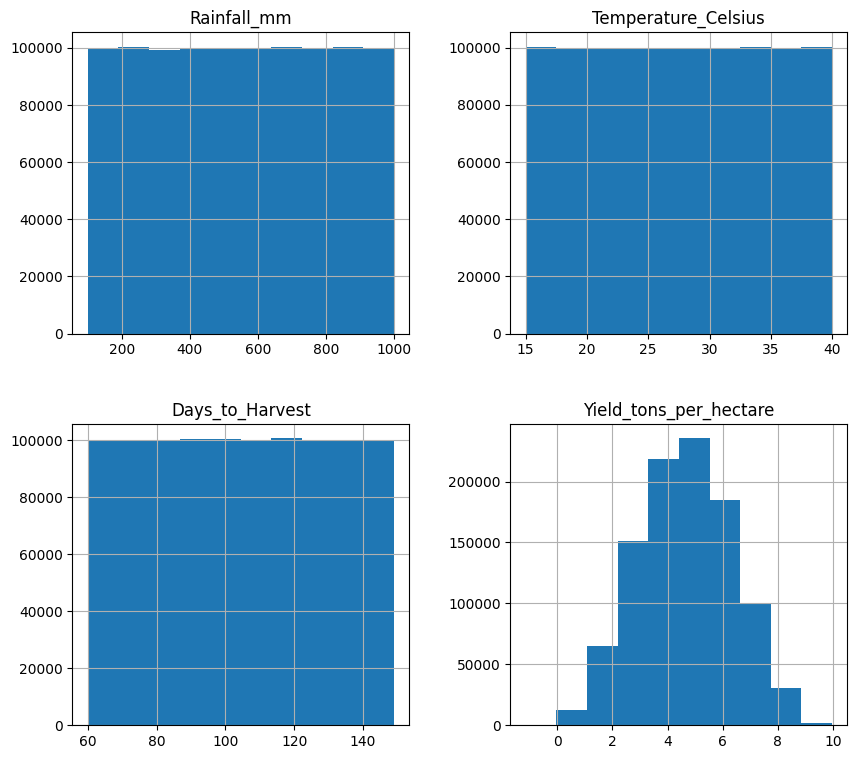

In [18]:
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()